In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('digit-recognizer/train.csv')
data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
data = np.array(data)
m, n = data.shape

# shuffling before splitting into dev and train sets
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [13]:
Y_train

array([9, 9, 4, ..., 5, 1, 1])

In [15]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

# Activation function (1st layer)
def ReLU(Z):
    return np.maximum(Z, 0)

#Activation function (2nd layer/Output layer)
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

# Foward propagation (Multiplying by Weights and adding biases to get rid of linearity)
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

# Derivative of Relu
def ReLU_deriv(Z):
    return Z > 0

# one hot encoding (used to convert categorical labels into numeric form. Like fro number 4 it could be represented as array of numbers)
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

# Backwards propagation
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [17]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

# Calculates loss and and gradient function of it and updates values so that it moves in the opposite direction of the gradient
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [19]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[4 5 3 ... 9 9 3] [9 9 4 ... 5 1 1]
0.09114634146341463
Iteration:  10
[4 3 3 ... 8 9 3] [9 9 4 ... 5 1 1]
0.14965853658536585
Iteration:  20
[4 8 3 ... 8 9 3] [9 9 4 ... 5 1 1]
0.18960975609756098
Iteration:  30
[4 8 3 ... 3 9 3] [9 9 4 ... 5 1 1]
0.23760975609756096
Iteration:  40
[4 8 3 ... 3 9 3] [9 9 4 ... 5 1 1]
0.2995853658536585
Iteration:  50
[4 3 3 ... 3 1 3] [9 9 4 ... 5 1 1]
0.3713658536585366
Iteration:  60
[4 3 3 ... 3 1 3] [9 9 4 ... 5 1 1]
0.44226829268292683
Iteration:  70
[9 3 3 ... 3 1 3] [9 9 4 ... 5 1 1]
0.5043658536585366
Iteration:  80
[9 3 3 ... 3 1 3] [9 9 4 ... 5 1 1]
0.552609756097561
Iteration:  90
[9 3 3 ... 3 1 3] [9 9 4 ... 5 1 1]
0.5888292682926829
Iteration:  100
[9 3 3 ... 3 1 1] [9 9 4 ... 5 1 1]
0.6195853658536585
Iteration:  110
[9 3 3 ... 3 1 1] [9 9 4 ... 5 1 1]
0.6443414634146342
Iteration:  120
[9 3 4 ... 3 1 1] [9 9 4 ... 5 1 1]
0.6640975609756098
Iteration:  130
[9 3 4 ... 3 1 1] [9 9 4 ... 5 1 1]
0.6810243902439025
Iteration:  1

In [21]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [9]
Label:  9


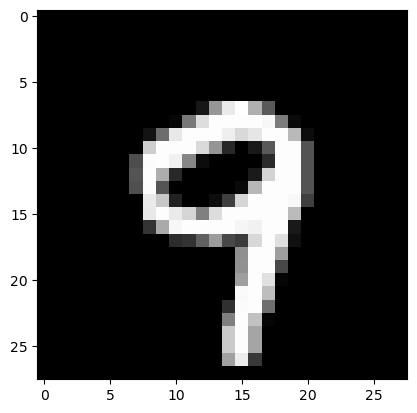

Prediction:  [3]
Label:  9


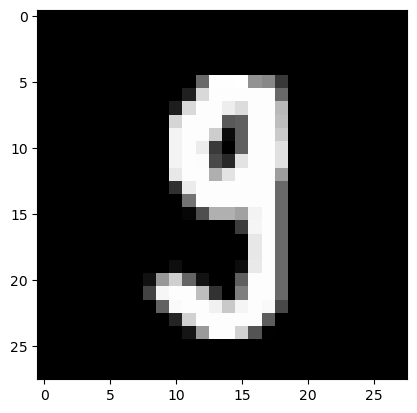

Prediction:  [4]
Label:  4


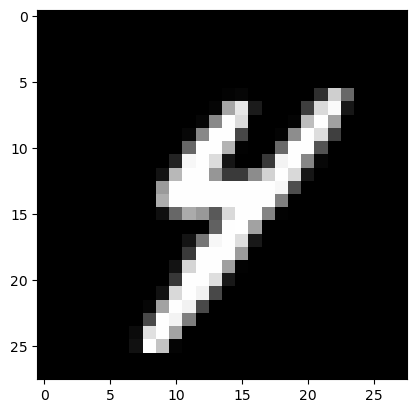

Prediction:  [0]
Label:  0


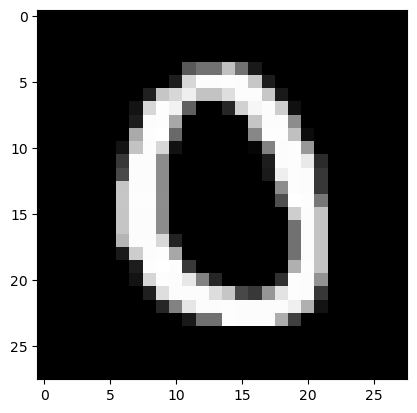

In [23]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [25]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[4 3 6 6 5 0 5 8 6 7 1 8 1 0 4 2 1 3 3 7 7 9 2 6 0 0 5 3 9 7 9 3 9 7 5 0 8
 2 0 9 6 9 5 6 0 8 9 7 4 9 9 9 3 0 6 0 1 5 4 1 5 4 4 2 1 3 1 1 2 3 6 1 9 5
 9 6 3 7 4 4 6 1 4 2 0 0 4 1 6 2 1 2 6 4 3 4 6 6 0 1 6 3 7 9 8 6 3 8 9 3 0
 7 6 9 4 3 4 1 0 4 7 7 7 2 3 8 7 7 4 0 3 7 7 5 1 7 8 7 4 0 6 9 9 0 4 9 9 2
 0 7 2 4 2 0 0 1 1 6 2 4 3 2 6 7 4 2 1 3 1 6 9 7 8 2 0 0 8 0 2 1 6 2 4 7 1
 0 2 9 8 5 5 4 0 8 1 3 8 4 0 8 7 7 6 9 0 8 7 2 2 6 8 0 6 1 0 3 3 5 7 5 8 0
 4 9 4 1 7 6 6 5 8 8 9 7 4 9 8 3 3 0 7 1 4 7 4 9 6 7 4 4 2 5 8 5 6 1 2 1 2
 2 4 6 7 4 4 6 9 4 1 8 3 5 7 2 7 4 4 9 3 8 1 6 8 9 7 4 7 3 6 5 0 0 4 7 4 1
 7 7 4 9 2 6 9 1 7 0 6 7 1 0 2 8 3 3 0 5 7 2 5 7 3 0 0 9 5 4 8 6 8 5 9 4 4
 4 0 7 7 3 2 1 4 0 6 8 5 0 1 7 5 4 3 2 7 5 2 9 5 3 7 6 3 3 5 7 2 5 9 6 2 8
 6 7 5 3 1 0 3 0 6 1 4 9 7 6 7 1 0 9 3 2 2 4 1 5 9 0 6 3 4 4 2 0 2 2 8 3 5
 3 4 3 0 0 8 3 2 7 0 1 1 6 8 3 3 2 4 0 2 1 7 2 6 5 8 6 3 2 9 8 3 3 1 4 2 6
 3 6 9 1 4 9 7 6 6 5 3 3 9 4 2 5 1 8 3 9 7 0 4 4 0 8 4 5 1 2 9 6 3 9 8 4 1
 5 3 1 9 0 6 0 1 0 8 7 9 

0.851

## 85% accuracy achieved